In [1]:
def get_correct_cardinalities(gt_path, p):
    from utils.gt.gt import GT
    import tqdm
    correct_labels = {}
    
    gt = GT()
    gt.load(gt_path)
    
    cy, cx = 0, 0
    frame_offset = p.video_start_t
    if p.video_crop_model is not None:
        cy = p.video_crop_model['y1']
        cx = p.video_crop_model['x1']
    
    gt.set_offset(y=cy, x=cx, frames=frame_offset)
    
    for tracklet in tqdm.tqdm_notebook(p.chm.tracklet_gen(), total=len(p.chm)):
        id_set = gt.tracklet_id_set(tracklet, p)
    
        correct_labels[tracklet.id()] = len(id_set)
        
    return correct_labels

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [3]:
from core.project.project import Project
from sys import maxsize
import numpy as np
import time

projects = [Project() for _ in range(4)]
    
projects[0].load('/Users/flipajs/Documents/wd/ferda/180810_2359_Cam1_clip_fixed_cardinality'),
projects[1].load('/Users/flipajs/Documents/wd/ferda/180819_Sowbug3_cut_new_setup'),
projects[2].load('/Users/flipajs/Documents/wd/ferda/180811_0832_5Zebrafish_nocover_22min_fixed_cardinality'),
projects[3].load('/Users/flipajs/Documents/wd/ferda/180811_0205_Camera3-5min_fixed_cardinality'),


cardinalities_gt_list = [
    get_correct_cardinalities('data/GT/Cam1_clip.avi.pkl', projects[0]),
    get_correct_cardinalities('data/GT/Sowbug3_cut.pkl', projects[1]),
    get_correct_cardinalities('data/GT/5Zebrafish_nocover_22min.pkl', projects[2]),
    get_correct_cardinalities('data/GT/Camera3-5min.mp4.pkl', projects[3]),
]



Initializing db at /Users/flipajs/Documents/wd/ferda/180810_2359_Cam1_clip_fixed_cardinality/rm.sqlite3 
saving chm
saving GM
Initializing db at /Users/flipajs/Documents/wd/ferda/180819_Sowbug3_cut_new_setup/rm.sqlite3 
saving chm
saving GM
Initializing db at /Users/flipajs/Documents/wd/ferda/180811_0832_5Zebrafish_nocover_22min_fixed_cardinality/rm.sqlite3 
saving chm
saving GM
Initializing db at /Users/flipajs/Documents/wd/ferda/180811_0205_Camera3-5min_fixed_cardinality/rm.sqlite3 
saving chm
saving GM
GT was sucessfully loaded from data/GT/Cam1_clip.avi.pkl


CONSISTENCY I,  4
CONSISTENCY I,  1
CONSISTENCY I,  2
CONSISTENCY I,  3
CONSISTENCY I,  4
CONSISTENCY I,  5
CONSISTENCY I,  1
CONSISTENCY I,  2
CONSISTENCY I,  3
CONSISTENCY I,  4
CONSISTENCY I,  5
CONSISTENCY I,  380

GT was sucessfully loaded from data/GT/Sowbug3_cut.pkl



GT was sucessfully loaded from data/GT/5Zebrafish_nocover_22min.pkl


CONSISTENCY I,  64
CONSISTENCY I,  4
CONSISTENCY I,  5
CONSISTENCY I,  6
CONSISTENCY I,  7
CONSISTENCY I,  8
CONSISTENCY I,  9
CONSISTENCY I,  10
CONSISTENCY I,  11
CONSISTENCY I,  12
CONSISTENCY I,  13
CONSISTENCY I,  14
CONSISTENCY I,  15
CONSISTENCY I,  16
CONSISTENCY I,  17
CONSISTENCY I,  18
CONSISTENCY I,  19
CONSISTENCY I,  20
CONSISTENCY I,  21
CONSISTENCY I,  22
CONSISTENCY I,  23
CONSISTENCY I,  24
CONSISTENCY I,  25
CONSISTENCY I,  26
CONSISTENCY I,  27
CONSISTENCY I,  28
CONSISTENCY I,  29
CONSISTENCY I,  30
CONSISTENCY I,  31
CONSISTENCY I,  32
CONSISTENCY I,  33
CONSISTENCY I,  34
CONSISTENCY I,  35
CONSISTENCY I,  36
CONSISTENCY I,  37
CONSISTENCY I,  38
CONSISTENCY I,  39
CONSISTENCY I,  40
CONSISTENCY I,  41
CONSISTENCY I,  42
CONSISTENCY I,  43
CONSISTENCY I,  44
CONSISTENCY I,  45
CONSISTENCY I,  46
CONSISTENCY I,  47
CONSISTENCY I,  48
CONSISTENCY I,  49
CONSISTENCY I,  50
CONSISTENCY I,  51
CONSISTENCY I,  52
CONSISTENCY I,  53
CONSISTENCY I,  54
CONSISTENCY I,  55

CONSISTENCY I,  132



In [7]:
from experiments.cardinality_classifier import global_cardinality_classifier as g_cardinality_clf
reload(g_cardinality_clf)

collateral_sets_list = []
tracklets_list = []
predecessors_list = []
successors_list = []
areas_list = []
median_areas_list = []
cardinalities_list = []
tracklets_len_list = []

for p in projects:
    print(p.name)
    collateral_sets_list.append(g_cardinality_clf.get_collateral_sets(p, max_frame=5000))
    tracklets_list.append(set([t for cs in collateral_sets_list[-1] for t in cs]))
    print("#unique tracklets: {}, #collateral sets: {}".format(len(tracklets_list[-1]), 
                                                               len(collateral_sets_list[-1])))
    
    predecessors_list.append(g_cardinality_clf.generate_predecessor_map(tracklets_list[-1], p))
    successors_list.append(g_cardinality_clf.generate_successor_map(tracklets_list[-1], p))
    
    areas_list.append(g_cardinality_clf.get_median_areas(tracklets_list[-1], p))
    median_areas_list.append(np.median(areas_list[-1].values()))
    tracklets_len_list.append({t.id(): len(t) for t in tracklets_list[-1]})
    
    print("#animals {}, #tracklets: {}, #collateral sets: {}, mean area: {}".format(len(p.animals), 
                                                                                    len(tracklets_list[-1]), 
                                                                                    len(collateral_sets_list[-1]), 
                                                                                    median_areas_list[-1])
          )
    
    print("--------\n")


Cam1_clip
#unique tracklets: 724, #collateral sets: 1448
#animals 6, #tracklets: 724, #collateral sets: 1448, mean area: 927.5
--------

1_initial_Sowbug3_cut_180819
#unique tracklets: 138, #collateral sets: 276
#animals 5, #tracklets: 138, #collateral sets: 276, mean area: 436.5
--------

5Zebrafish_nocover_22min
#unique tracklets: 175, #collateral sets: 345
#animals 5, #tracklets: 175, #collateral sets: 345, mean area: 791.5
--------

Camera3-5min
#unique tracklets: 788, #collateral sets: 1576
#animals 10, #tracklets: 788, #collateral sets: 1576, mean area: 809.5
--------



In [ ]:
from experiments.cardinality_classifier import global_cardinality_classifier as g_cardinality_clf
reload(g_cardinality_clf)
i = 0
p = projects[0]

cardinalities = g_cardinality_clf.build_ilp_and_solve(
    tracklets_list[i], collateral_sets_list[i], predecessors_list[i], 
    successors_list[i], len(p.animals), median_areas_list[i], 
    areas_list[i], print_ilp=False, gamma=2.0)


for t_id in cardinalities.keys():
    if cardinalities[t_id] == 1:
        p.chm[t_id].segmentation_class = 0 # single
    elif cardinalities[t_id] >= 1:
        p.chm[t_id].segmentation_class = 1 # multi
    else:
        p.chm[t_id].segmentation_class = 2 # noise

p.save_chm_('/Users/flipajs/Documents/wd/ferda/180810_2359_Cam1_clip_fixed_cardinality/chm_new.pkl')      

gamma: 2.0
var registration t: 0.0167100429535
objective function: 23.9882011414
constraints: 3.65868592262
ILP construction tooks: 27.6724050045s
('Status:', 'Optimal')
('Total Cost = ', 4401241.0)
time: 1.04969191551s
1
saving chm


In [31]:
from experiments.cardinality_classifier import global_cardinality_classifier as g_cardinality_clf
reload(g_cardinality_clf)

cardinalities_list_default = []

for i, p in enumerate(projects):
    cardinalities_list_default.append(g_cardinality_clf.build_ilp_and_solve(
        tracklets_list[i], collateral_sets_list[i], predecessors_list[i], 
        successors_list[i], len(p.animals), median_areas_list[i], 
        areas_list[i], print_ilp=False, gamma=2.0))
    
# successors experiment
# predecessors experiment
# median vs mean

gamma: 2.0
var registration t: 0.0223169326782
objective function: 26.271294117
constraints: 3.77856707573
ILP construction tooks: 30.0812399387s
('Status:', 'Optimal')
('Total Cost = ', 4401241.0)
time: 0.940437078476s
1
gamma: 2.0
var registration t: 0.00315594673157
objective function: 0.601666927338
constraints: 0.61656498909
ILP construction tooks: 1.22383308411s
('Status:', 'Optimal')
('Total Cost = ', 1471383.0)
time: 0.14263510704s
1
gamma: 2.0
var registration t: 0.00418400764465
objective function: 0.849274873734
constraints: 0.69864487648
ILP construction tooks: 1.55419611931s
('Status:', 'Optimal')
('Total Cost = ', 955659.5)
time: 0.114772081375s
1
gamma: 2.0
var registration t: 0.0349810123444
objective function: 99.6775028706
constraints: 19.0059459209
ILP construction tooks: 118.729340076s
('Status:', 'Optimal')
('Total Cost = ', 5865359.0)
time: 2.92631983757s
1


In [9]:
from experiments.cardinality_classifier import global_cardinality_classifier as g_cardinality_clf
reload(g_cardinality_clf)

# gamma parameter experiments
gamma_exp = {}
for gamma in (0, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0, 15.0, 20.0, 100.0):
    cardinalities_list = []
    for i, p in enumerate(projects):
        cardinalities_list.append(g_cardinality_clf.build_ilp_and_solve(
            tracklets_list[i], collateral_sets_list[i], predecessors_list[i], 
            successors_list[i], len(p.animals), median_areas_list[i], 
            areas_list[i], print_ilp=False, gamma=gamma))
    
    gamma_exp[gamma] = cardinalities_list
    


gamma: 0
var registration t: 0.0186789035797
objective function: 25.9754428864
constraints: 4.20132398605
ILP construction tooks: 30.2038531303s
('Status:', 'Optimal')
('Total Cost = ', 4361277.0)
time: 1.10729598999s
1
gamma: 0
var registration t: 0.00362396240234
objective function: 0.53883600235
constraints: 0.571161985397
ILP construction tooks: 1.11537504196s
('Status:', 'Optimal')
('Total Cost = ', 1405196.0)
time: 0.172141075134s
1
gamma: 0
var registration t: 0.00397896766663
objective function: 0.822999000549
constraints: 0.69771695137
ILP construction tooks: 1.52718877792s
('Status:', 'Optimal')
('Total Cost = ', 955659.5)
time: 0.112879991531s
1
gamma: 0
var registration t: 0.0308120250702
objective function: 98.7813420296
constraints: 19.4624769688
ILP construction tooks: 118.285173178s
('Status:', 'Optimal')
('Total Cost = ', 5721215.0)
time: 4.14151501656s
1
gamma: 0.5
var registration t: 0.0146429538727
objective function: 25.6140668392
constraints: 3.73866295815
ILP con

In [11]:
with open('gamma_experiment_results.pkl', 'wb') as f:
    pickle.dump(gamma_exp, f)

In [8]:
with open('cardinality_classifier_gts.pkl', 'wb') as f:
    pickle.dump(cardinalities_gt_list, f)

In [9]:
# hand corrections
# gt is out of region...
cardinalities_gt_list[2][229] = 1
cardinalities_gt_list[2][63] = 1

ignore_ids = [
    [5071, 5072], # split into 2 parts
    [],
    [],
    [9027, 9028],
]

In [72]:
experiment = [('default', cardinalities_list_default)]

for name, cardinalities_list in experiment:
    for i, p in enumerate(projects):
        print(p.name)
        num_mistakes = 0   
        tracklets_len_sum = 0
        
        print("ILP")
        for t in tracklets_list[i]:
            id = t.id()
            if id in ignore_ids[i]:
                continue
                
            if cardinalities_gt_list[i][id] != cardinalities_list[i][id]:
                print("mistake, id: {}, correct cardinality: {}, estimated: {}".format(
                    id, cardinalities_gt_list[i][id], cardinalities_list[i][id])
                )
                num_mistakes += 1
                tracklets_len_sum += tracklets_len_list[i][id]
        
        print("#mistakes: {}, len: {}".format(num_mistakes, tracklets_len_sum))
        print("vs. VAIB")
        num_mistakes = 0
        tracklets_len_sum = 0
        
        for t in tracklets_list[i]:
            if t.id() in ignore_ids[i]:
                continue
            try:
                card = cardinalities_gt_list[i][t.id()]
                if card == 0 and t.is_noise():
                    pass
                elif card == 1 and t.is_single():
                    pass
                elif card > 1 and t.is_multi():
                    pass
                elif t.is_part() and card == 1 or card == 0:
                    pass
                else:
                    # print("mistake, id: {}, correct cardinality: {}, estimated: {}".format(
                    #     t.id(), cardinalities_gt_list[i][t.id()], t.segmentation_class_str()))
                    num_mistakes += 1
                    tracklets_len_sum += len(t)
            except:
                print(t.id())
            
        print("#mistakes: {}, len: {}".format(num_mistakes, tracklets_len_sum))
        print("------------------------------\n")

Cam1_clip
ILP
#mistakes: 0, len: 0
vs. VAIB
#mistakes: 14, len: 34
------------------------------

1_initial_Sowbug3_cut_180819
ILP
#mistakes: 0, len: 0
vs. VAIB
#mistakes: 3, len: 243
------------------------------

5Zebrafish_nocover_22min
ILP
#mistakes: 0, len: 0
vs. VAIB
#mistakes: 0, len: 0
------------------------------

Camera3-5min
ILP
#mistakes: 0, len: 0
vs. VAIB
#mistakes: 18, len: 77
------------------------------



In [11]:
import pickle
with open('gamma_experiment_results.pkl', 'rb') as f:
    gamma_exp = pickle.load(f)

In [59]:
experiment_gamma = []
x = []

for gamma in sorted(gamma_exp.keys()):
    experiment_gamma.append(('gamma={}'.format(gamma), gamma_exp[gamma]))
    x.append(gamma)

y_mistakes = []
y_effect = []
for name, cardinalities_list in experiment_gamma:
    print("--------- {} ----------".format(name))
    y_mistakes.append([])
    y_effect.append([])
    
    num_mistakes_sum = 0
    tracklets_len_sum_sum = 0
    for i, p in enumerate(projects):
        print(p.name)
        num_mistakes = 0   
        tracklets_len_sum = 0
        
        # print("ILP")
        for t in tracklets_list[i]:
            id = t.id()
            if id in ignore_ids[i]:
                continue
                
            if cardinalities_gt_list[i][id] != cardinalities_list[i][id]:
                print("mistake, id: {}, correct cardinality: {}, estimated: {}".format(
                    id, cardinalities_gt_list[i][id], cardinalities_list[i][id])
                )
                num_mistakes += 1
                tracklets_len_sum += tracklets_len_list[i][id]
        
        # print("#mistakes: {}, len: {}".format(num_mistakes, tracklets_len_sum))
        # print("------------------------------\n")
        
        y_mistakes[-1].append(num_mistakes)
        y_effect[-1].append(tracklets_len_sum)
        
        num_mistakes_sum += num_mistakes
        tracklets_len_sum_sum += tracklets_len_sum
    
    print("#mistakes: {}, len: {}".format(num_mistakes_sum, tracklets_len_sum_sum))
    # print("------------------------------\n")

--------- gamma=0 ----------
Cam1_clip
mistake, id: 698, correct cardinality: 4, estimated: 5
mistake, id: 1434, correct cardinality: 1, estimated: 0
mistake, id: 1263, correct cardinality: 4, estimated: 5
mistake, id: 4904, correct cardinality: 1, estimated: 2
mistake, id: 2041, correct cardinality: 1, estimated: 2
mistake, id: 310, correct cardinality: 4, estimated: 5
mistake, id: 4909, correct cardinality: 1, estimated: 0
mistake, id: 5177, correct cardinality: 1, estimated: 2
mistake, id: 952, correct cardinality: 4, estimated: 5
mistake, id: 5176, correct cardinality: 1, estimated: 0
mistake, id: 3523, correct cardinality: 1, estimated: 2
mistake, id: 5185, correct cardinality: 4, estimated: 5
mistake, id: 472, correct cardinality: 1, estimated: 0
mistake, id: 447, correct cardinality: 1, estimated: 0
mistake, id: 920, correct cardinality: 3, estimated: 4
mistake, id: 596, correct cardinality: 2, estimated: 3
mistake, id: 5175, correct cardinality: 1, estimated: 2
mistake, id: 517

[[ 25  11   0 120]
 [  7   4   0  42]
 [  7   4   0   8]
 [  0   2   0   2]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]
[0, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0, 15.0, 20.0, 100.0]


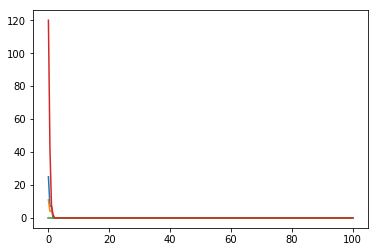

In [24]:
import numpy as np
%matplotlib inline

y_mistakes = np.array(y_mistakes)
print(y_mistakes)
print(x)
for i in range(y_mistakes.shape[1]):
    plt.plot(x, y_mistakes[:, i])    
# np.sum(y_mistakes, axis=1)
# # 

# plt.show()

In [15]:
for i, p in enumerate(projects):
    print(p.name)
    total_len = 0
    single_len = 0
    for id in tracklets_len_list[i].keys():
        t_len = tracklets_len_list[i][id]
        total_len += t_len
        if cardinalities_gt_list[i][id] == 1:
            single_len += t_len
    
    print("single-ID: {:.1%}".format(single_len/float(total_len)))

Cam1_clip
single-ID: 85.2%
1_initial_Sowbug3_cut_180819
single-ID: 93.4%
5Zebrafish_nocover_22min
single-ID: 98.8%
Camera3-5min
single-ID: 95.3%


In [25]:
from experiments.cardinality_classifier import global_cardinality_classifier as g_cardinality_clf
reload(g_cardinality_clf)

cardinalities_list_no_successors_default = []

for i, p in enumerate(projects):
    cardinalities_list_no_successors_default.append(g_cardinality_clf.build_ilp_and_solve(
        tracklets_list[i], collateral_sets_list[i], predecessors_list[i], 
        {}, len(p.animals), median_areas_list[i], 
        areas_list[i], print_ilp=False, gamma=2.0))
    

gamma: 2.0
var registration t: 0.0193870067596
objective function: 25.442070961
constraints: 3.35020709038
ILP construction tooks: 28.8629260063s
('Status:', 'Optimal')
('Total Cost = ', 4401241.0)
time: 0.932729959488s
1
gamma: 2.0
var registration t: 0.00354099273682
objective function: 0.593746900558
constraints: 0.502007007599
ILP construction tooks: 1.10098195076s
('Status:', 'Optimal')
('Total Cost = ', 1471383.0)
time: 0.138576030731s
1
gamma: 2.0
var registration t: 0.00441598892212
objective function: 0.868978977203
constraints: 0.634683132172
ILP construction tooks: 1.50969910622s
('Status:', 'Optimal')
('Total Cost = ', 955659.5)
time: 0.0978910923004s
1
gamma: 2.0
var registration t: 0.0279757976532
objective function: 96.0166769028
constraints: 18.3057100773
ILP construction tooks: 114.358493805s
('Status:', 'Optimal')
('Total Cost = ', 5865359.0)
time: 2.80202794075s
1


In [36]:
from experiments.cardinality_classifier import global_cardinality_classifier as g_cardinality_clf
reload(g_cardinality_clf)

cardinalities_list_no_predecessors_default = []

for i, p in enumerate(projects):
    cardinalities_list_no_predecessors_default.append(g_cardinality_clf.build_ilp_and_solve(
        tracklets_list[i], collateral_sets_list[i], {}, 
        {}, len(p.animals), median_areas_list[i], 
        areas_list[i], print_ilp=False, gamma=2.0))

gamma: 2.0
var registration t: 0.0181150436401
objective function: 25.8274979591
constraints: 2.84297394753
ILP construction tooks: 28.6951220036s
('Status:', 'Optimal')
('Total Cost = ', 4401241.0)
time: 0.88795208931s
1
gamma: 2.0
var registration t: 0.00336003303528
objective function: 0.59765791893
constraints: 0.400537967682
ILP construction tooks: 1.00315189362s
('Status:', 'Optimal')
('Total Cost = ', 1469174.0)
time: 0.125217914581s
1
gamma: 2.0
var registration t: 0.0037899017334
objective function: 0.933888912201
constraints: 0.512069940567
ILP construction tooks: 1.45167803764s
('Status:', 'Optimal')
('Total Cost = ', 955659.5)
time: 0.08531498909s
1
gamma: 2.0
var registration t: 0.0884680747986
objective function: 97.0805790424
constraints: 17.3063151836
ILP construction tooks: 114.482650995s
('Status:', 'Optimal')
('Total Cost = ', 5865359.0)
time: 2.30979609489s
1


In [33]:
from experiments.cardinality_classifier import global_cardinality_classifier as g_cardinality_clf
reload(g_cardinality_clf)

cardinalities_list_no_tracklet_weights = []

for i, p in enumerate(projects):
    new_lens = {t_id: 1 for t_id in tracklets_len_list[i]}
    cardinalities_list_no_tracklet_weights.append(g_cardinality_clf.build_ilp_and_solve(
        tracklets_list[i], collateral_sets_list[i], predecessors_list[i], 
        successors_list[i], len(p.animals), median_areas_list[i], 
        areas_list[i], print_ilp=False, gamma=2.0, tracklet_weights=new_lens))

gamma: 2.0
var registration t: 0.0205299854279
objective function: 26.048869133
constraints: 3.60250210762
ILP construction tooks: 29.6791610718s
('Status:', 'Optimal')
('Total Cost = ', 227140.5)
time: 1.54599690437s
1
gamma: 2.0
var registration t: 0.0040271282196
objective function: 0.486881017685
constraints: 0.657949924469
ILP construction tooks: 1.15097403526s
('Status:', 'Optimal')
('Total Cost = ', 13450.5)
time: 0.165442943573s
1
gamma: 2.0
var registration t: 0.0042929649353
objective function: 0.88028383255
constraints: 0.77015209198
ILP construction tooks: 1.65704321861s
('Status:', 'Optimal')
('Total Cost = ', 10957.5)
time: 0.106038093567s
1
gamma: 2.0
var registration t: 0.0319049358368
objective function: 99.0795331001
constraints: 19.2569839954
ILP construction tooks: 118.377239943s
('Status:', 'Optimal')
('Total Cost = ', 234281.5)
time: 94.1573338509s
1


In [38]:
with open('cardinality_classifier_abblation_study_exp', 'wb') as f:
    pickle.dump({
        'default': cardinalities_list_default,
        'successors': cardinalities_list_no_predecessors_default,
        'predecessors': cardinalities_list_no_predecessors_default,
        'no_len': cardinalities_list_no_tracklet_weights,
    }, f)

In [67]:
experiment = [
    ('default', cardinalities_list_default),
    ('successors', cardinalities_list_no_predecessors_default),
    ('predecessors', cardinalities_list_no_predecessors_default),
    ('no_len', cardinalities_list_no_tracklet_weights),
              ]

mistakes = np.zeros((4, 4))
mistakes_effect = np.zeros((4, 4))
for exp_i, (name, cardinalities_list) in enumerate(experiment):
    print("------- EXPERIMENT: {}".format(name))
    for i, p in enumerate(projects):
        print(p.name)
        num_mistakes = 0   
        tracklets_len_sum = 0
        
        for t in tracklets_list[i]:
            id = t.id()
            if id in ignore_ids[i]:
                continue
                
            if cardinalities_gt_list[i][id] != cardinalities_list[i][id]:
                # print("mistake, id: {}, correct cardinality: {}, estimated: {}".format(
                #     id, cardinalities_gt_list[i][id], cardinalities_list[i][id])
                # )
                num_mistakes += 1
                tracklets_len_sum += tracklets_len_list[i][id]
                
                mistakes[exp_i, i] += 1
                mistakes_effect[exp_i, i] += tracklets_len_list[i][id]
        
        print("#mistakes: {}, len: {}".format(num_mistakes, tracklets_len_sum))

------- EXPERIMENT: default
Cam1_clip
#mistakes: 0, len: 0
1_initial_Sowbug3_cut_180819
#mistakes: 0, len: 0
5Zebrafish_nocover_22min
#mistakes: 0, len: 0
Camera3-5min
#mistakes: 0, len: 0
------- EXPERIMENT: successors
Cam1_clip
#mistakes: 0, len: 0
1_initial_Sowbug3_cut_180819
#mistakes: 4, len: 6
5Zebrafish_nocover_22min
#mistakes: 0, len: 0
Camera3-5min
#mistakes: 0, len: 0
------- EXPERIMENT: predecessors
Cam1_clip
#mistakes: 0, len: 0
1_initial_Sowbug3_cut_180819
#mistakes: 4, len: 6
5Zebrafish_nocover_22min
#mistakes: 0, len: 0
Camera3-5min
#mistakes: 0, len: 0
------- EXPERIMENT: no_len
Cam1_clip
#mistakes: 3, len: 18
1_initial_Sowbug3_cut_180819
#mistakes: 0, len: 0
5Zebrafish_nocover_22min
#mistakes: 0, len: 0
Camera3-5min
#mistakes: 99, len: 1758


In [69]:
print(tabulate(mistakes, tablefmt="latex"))
print(mistakes_effect)

\begin{tabular}{rrrr}
\hline
 0 & 0 & 0 &  0 \\
 0 & 4 & 0 &  0 \\
 0 & 4 & 0 &  0 \\
 3 & 0 & 0 & 99 \\
\hline
\end{tabular}
[[   0.    0.    0.    0.]
 [   0.    6.    0.    0.]
 [   0.    6.    0.    0.]
 [  18.    0.    0. 1758.]]


In [55]:
from tabulate import tabulate
print(x)
s = ""
for gamma in x:
    s += '{} & '.format(gamma)
print(s)
# print(tabulate(np.array(x), tablefmt="latex"))
print(tabulate(y_mistakes.T[:, :7], tablefmt="latex"))

print(np.array(y_effect).T)

[0, 0.5, 1.0, 1.5, 2.0, 2.5, 5.0, 10.0, 15.0, 20.0, 100.0]
0 & 0.5 & 1.0 & 1.5 & 2.0 & 2.5 & 5.0 & 10.0 & 15.0 & 20.0 & 100.0 & 
\begin{tabular}{rrrrrrr}
\hline
  25 &  7 & 7 & 0 & 0 & 0 & 0 \\
  11 &  4 & 4 & 2 & 0 & 0 & 0 \\
   0 &  0 & 0 & 0 & 0 & 0 & 0 \\
 120 & 42 & 8 & 2 & 0 & 0 & 0 \\
\hline
\end{tabular}
[[ 188   74   74    0    0    0    0    0    0    0    0]
 [1958    6    6    2    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [1062  198   12    2    0    0    0    0    0    0    0]]


In [74]:
paths = [ 
    '/Users/flipajs/Documents/wd/ferda/180810_2359_Cam1_clip_fixed_cardinality',
    '/Users/flipajs/Documents/wd/ferda/180819_Sowbug3_cut_new_setup',
    '/Users/flipajs/Documents/wd/ferda/180811_0832_5Zebrafish_nocover_22min_fixed_cardinality',
    '/Users/flipajs/Documents/wd/ferda/180811_0205_Camera3-5min_fixed_cardinality',
]

for path, p, cardinalities in zip(paths, projects, cardinalities_list):
    for t_id in cardinalities.keys():
        if cardinalities[t_id] == 1:
            p.chm[t_id].segmentation_class = 0 # single
        elif cardinalities[t_id] >= 1:
            p.chm[t_id].segmentation_class = 1 # multi
        else:
            p.chm[t_id].segmentation_class = 2 # noise
    
    p.save_chm_(path+'/chm_new.pkl')

saving chm
saving chm
saving chm
saving chm
